# Importando Bibliotecas

In [2]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metricas e ferramentas de processamento do SKLEARN

from sklearn import metrics  # Métricas adicionais para avaliação de modelos
from sklearn.model_selection import train_test_split, KFold  # Funções para dividir dados em conjuntos de treino e teste, e para validação cruzada
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de avaliação de modelos de classificação
from sklearn.preprocessing import StandardScaler  # Ferramenta para pré-processamento de dados (escalonamento)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score  # Métricas de avaliação de modelos de classificação


# Técnicas de apredizado de máquina

from sklearn.linear_model import LinearRegression  # Implementação de regressão linear
from sklearn.naive_bayes import GaussianNB  # Implementação do algoritmo Naive Bayes Gaussiano
from sklearn import tree  # Implementação de árvores de decisão
from sklearn.ensemble import RandomForestClassifier  # Implementação de classificador de floresta aleatória
from sklearn.svm import SVC  # Implementação do algoritmo SVM (Support Vector Machine)
from sklearn.neighbors import KNeighborsClassifier # Implementação do algoritmo KNN
from sklearn.linear_model import LogisticRegression
# Bivlioteca TensorFlow

from tensorflow.keras.models import Sequential  # Modelo de rede neural sequencial do Keras
from tensorflow.keras.layers import *  # Camadas de uma rede neural no Keras
from tensorflow.keras.callbacks import ModelCheckpoint  # Callback para salvar o modelo durante o treinamento
from tensorflow.keras.losses import MeanSquaredError  # Função de perda para regressão no Keras
from tensorflow.keras.metrics import RootMeanSquaredError  # Métrica adicional para avaliação de modelos de regressão
from tensorflow.keras.optimizers import Adam  # Otimizador Adam para treinamento de redes neurais no Keras


In [3]:
# Importando Base de Dados Fridge
GPS = pd.read_csv('/content/Train_Test_IoT_GPS_Tracker.csv')

In [4]:
# Definindo método de normalização de variáveis Max_Min
def max_min(x):
  return (x- x.min())/(x.max() - x.min())

In [5]:
# Mapeamento das variáveis nominais para numéricas
mapeamento = {'high':1, 'low':0, 'normal':0, 'ddos':1, 'backdoor':2, 'injection':3, 'password':4, 'ransomware':5, 'xss':6, 'default': 0, 'scanning': 7, 'closed': 0, 'open': 1, 'true': 2, 'false': 3, '0': 0, '1' : 1}

# Pré-processamento

Visão geral do Banco de dados

In [6]:
GPS.head()

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos


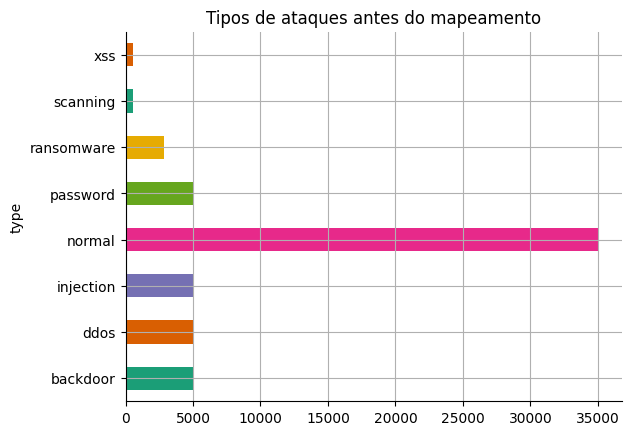

In [7]:
GPS.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Tipos de ataques antes do mapeamento")
plt.grid()

In [8]:
GPS = GPS.replace(mapeamento)# mapeia as variáveis nominais

Normatizando o banco de dados

In [9]:
GPS['latitude'] = GPS['latitude'].transform(max_min)
GPS['longitude'] = GPS['longitude'].transform(max_min)

In [10]:
GPS['ts'] = GPS['ts'].transform(max_min)

In [11]:
# colunas = [0]*len(GPS['ts'])
# for i in range (len(GPS['ts'])):
#      colunas[i] = i
# GPS['coluns'] = colunas

In [12]:
#  GPS['coluns'] = GPS['coluns'].transform(max_min)

In [13]:
GPS.head()

,ts,date,time,latitude,longitude,label,type
0,0.902839,25-Apr-19,18:31:39,0.212096,0.224096,1,1
1,0.902839,25-Apr-19,18:31:41,0.221600,0.229435,1,1
2,0.902842,25-Apr-19,18:31:46,0.221696,0.229504,1,1
3,0.902843,25-Apr-19,18:31:49,0.212259,0.224210,1,1
4,0.902844,25-Apr-19,18:31:51,0.221779,0.229579,1,1


Definindo treinamento e teste

In [14]:
# Atributos
atributos = GPS[['ts', 'latitude', 'longitude']]
classe = GPS['type']

In [15]:
# Visualizando Atributos
atributos.head()

,ts,latitude,longitude
0,0.902839,0.212096,0.224096
1,0.902839,0.221600,0.229435
2,0.902842,0.221696,0.229504
3,0.902843,0.212259,0.224210
4,0.902844,0.221779,0.229579


In [16]:
# Separando dados de Treino e Teste em proporção 80% 20%, com random_state = 42
X_train, X_test, y_train, y_test = train_test_split(atributos, classe, test_size=0.2, random_state=42)

# 1º técnica - Arvore de decisão

In [17]:
#definindo um classificador Arvore de decisão
clf_AV = tree.DecisionTreeClassifier()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(clf_AV, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
clf_AV = clf_AV.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 1.0


In [18]:
#Predição e Acurácia de Teste
predicao_1 = clf_AV.predict(X_test)
acuracia_1 = accuracy_score(y_test, predicao_1)
print('Acurácia da classificação: {}' . format(round(acuracia_1,4)))

Acurácia da classificação: 1.0


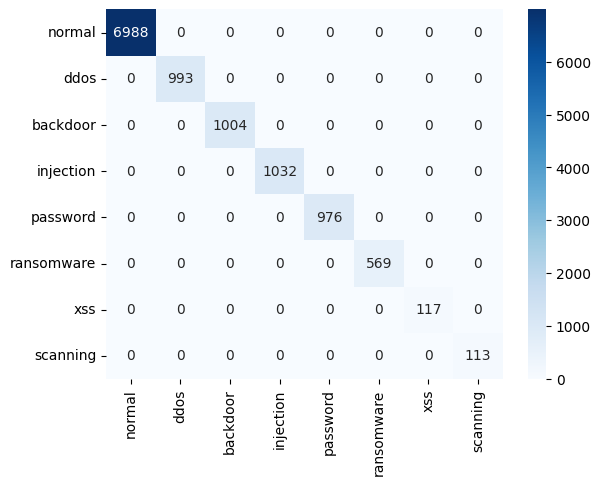

In [19]:
#Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor' , 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_1), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [20]:
print(classification_report(y_test, predicao_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6988
           1       1.00      1.00      1.00       993
           2       1.00      1.00      1.00      1004
           3       1.00      1.00      1.00      1032
           4       1.00      1.00      1.00       976
           5       1.00      1.00      1.00       569
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00       113

    accuracy                           1.00     11792
   macro avg       1.00      1.00      1.00     11792
weighted avg       1.00      1.00      1.00     11792



# 2º técnica - KNN

In [21]:
#definindo um classificador KNN
clf_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(clf_KNN, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
clf_KNN = clf_KNN.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 1.0


In [22]:
#Predição e Acurácia de Teste
predicao_2 = clf_KNN.predict(X_test)
acuracia_2 = accuracy_score(y_test, predicao_2)
print('Acurácia da classificação: {}' . format(round(acuracia_2, 4)))

Acurácia da classificação: 1.0


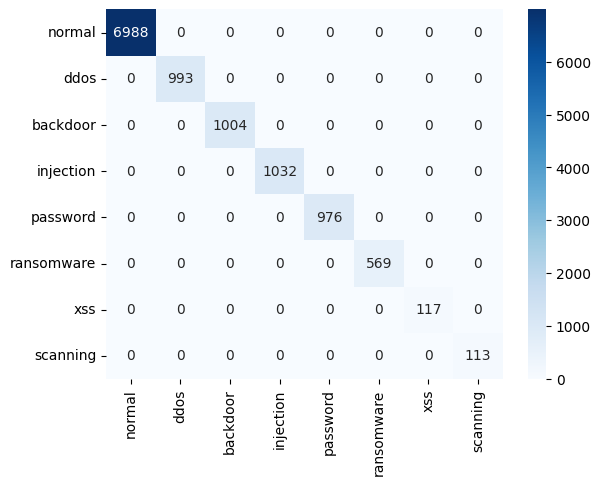

In [23]:
# Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor' , 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_2), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [24]:
print(classification_report(y_test, predicao_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6988
           1       1.00      1.00      1.00       993
           2       1.00      1.00      1.00      1004
           3       1.00      1.00      1.00      1032
           4       1.00      1.00      1.00       976
           5       1.00      1.00      1.00       569
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00       113

    accuracy                           1.00     11792
   macro avg       1.00      1.00      1.00     11792
weighted avg       1.00      1.00      1.00     11792



# 3º técnica - SVM

In [25]:
#definindo um classificador SVM
SVM_rbf = SVC(kernel = 'rbf', gamma = 'auto', C = 1.0 )

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(SVM_rbf, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
SVM_rbf.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.9459


SVC(gamma='auto')

In [26]:
#Predição e Acurácia de Teste
predicao_3 = SVM_rbf.predict(X_test)
acuracia_3 = accuracy_score(y_test, predicao_3)
print('Acurácia da classificação: {}' . format(round(acuracia_3,4)))

Acurácia da classificação: 0.9459


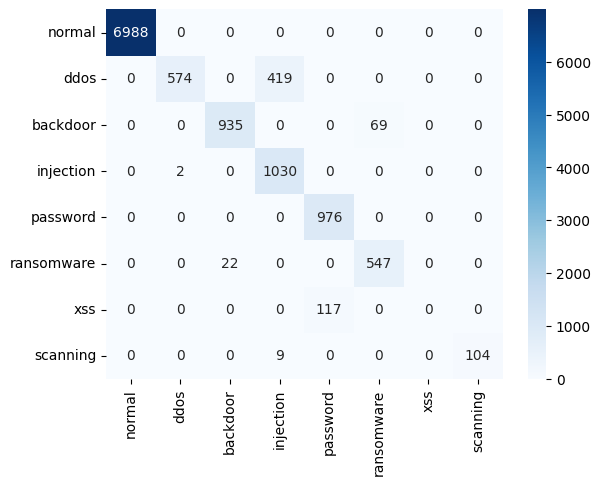

In [27]:
#Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_3), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [28]:
print(classification_report(y_test, predicao_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6988
           1       1.00      0.58      0.73       993
           2       0.98      0.93      0.95      1004
           3       0.71      1.00      0.83      1032
           4       0.89      1.00      0.94       976
           5       0.89      0.96      0.92       569
           6       0.00      0.00      0.00       117
           7       1.00      0.92      0.96       113

    accuracy                           0.95     11792
   macro avg       0.81      0.80      0.79     11792
weighted avg       0.95      0.95      0.94     11792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4º Regressão Logistica

In [29]:
#definindo um classificador Arvore de decisão
LR = LogisticRegression(solver='lbfgs', max_iter=1000)

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(LR, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
LR = LR.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.9089


In [30]:
#Predição e Acurácia de Teste
predicao_40 = LR.predict(X_test)
acuracia_40 = accuracy_score(y_test, predicao_40)
print('Acurácia da classificação: {}' . format(round(acuracia_40,4)))

Acurácia da classificação: 0.9135


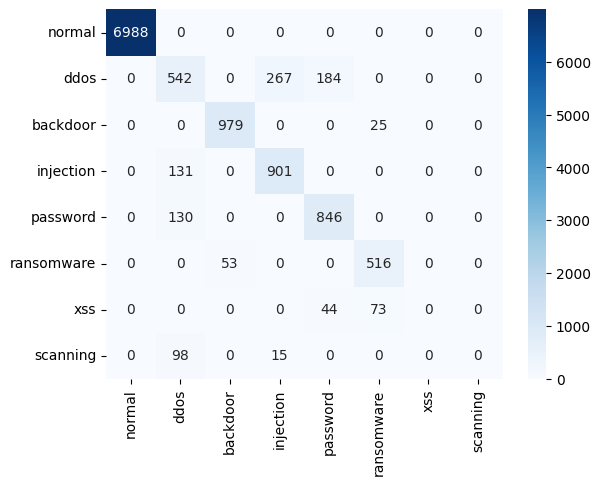

In [31]:
# Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_40), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [32]:
print(classification_report(y_test, predicao_40))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6988
           1       0.60      0.55      0.57       993
           2       0.95      0.98      0.96      1004
           3       0.76      0.87      0.81      1032
           4       0.79      0.87      0.83       976
           5       0.84      0.91      0.87       569
           6       0.00      0.00      0.00       117
           7       0.00      0.00      0.00       113

    accuracy                           0.91     11792
   macro avg       0.62      0.65      0.63     11792
weighted avg       0.90      0.91      0.90     11792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5º Técnica - Regressão linear

In [33]:
#Definindo um classificador de regreção linear
reg = LinearRegression().fit(X_train, y_train)

In [34]:
# Predição e criação de variável auxiliar
predicao_4 = reg.predict(X_test)
aux = np.zeros(len(X_test))

# Aproximando a predição para o inteiro mais próximo e armazenando na variável auxiliar
for i in range(len(X_test)):
    aux[i] = round(predicao_4[i], 0)

# Acurácia de Teste
acuracia_4 = accuracy_score(y_test, aux[:].astype(int))
print('Acurácia da classificação: {}'.format(round(acuracia_4, 3)))


Acurácia da classificação: 0.658


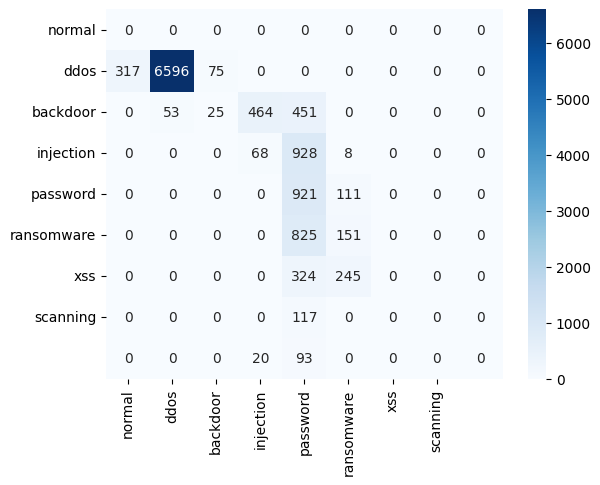

In [35]:
#Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, aux), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [36]:
print(classification_report(y_test, aux))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.99      0.94      0.97      6988
         1.0       0.25      0.03      0.05       993
         2.0       0.12      0.07      0.09      1004
         3.0       0.25      0.89      0.39      1032
         4.0       0.29      0.15      0.20       976
         5.0       0.00      0.00      0.00       569
         6.0       0.00      0.00      0.00       117
         7.0       0.00      0.00      0.00       113

    accuracy                           0.66     11792
   macro avg       0.21      0.23      0.19     11792
weighted avg       0.67      0.66      0.64     11792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# 6º Técnica - Naïve Bayes (NB)

In [37]:
#definindo um classificador NB
NB = GaussianNB()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(NB, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
NB.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.9993


GaussianNB()

In [38]:
#Predição e Acurácia de Teste
predicao_5 = NB.predict(X_test)
acuracia_5 = accuracy_score(y_test, predicao_5)
print('Acurácia da classificação: {}' . format(round(acuracia_5,4)))

Acurácia da classificação: 0.9997


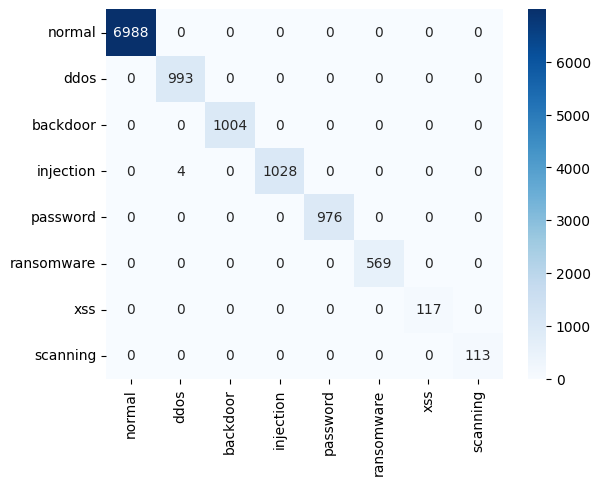

In [39]:
#Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_5), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [40]:
print(classification_report(y_test, predicao_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6988
           1       1.00      1.00      1.00       993
           2       1.00      1.00      1.00      1004
           3       1.00      1.00      1.00      1032
           4       1.00      1.00      1.00       976
           5       1.00      1.00      1.00       569
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00       113

    accuracy                           1.00     11792
   macro avg       1.00      1.00      1.00     11792
weighted avg       1.00      1.00      1.00     11792



# 7º Técnica - Random Forest

In [41]:
#definindo um classificador NB
RF = RandomForestClassifier()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(NB, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
RF.fit(X_train,y_train)

Acurácia média durante a validação cruzada: 0.9993


RandomForestClassifier()

In [42]:
#Predição e Acurácia de Teste
predicao_6 = RF.predict(X_test)
acuracia_6 = accuracy_score(y_test, predicao_6)
print('Acurácia da classificação: {}' . format(round(acuracia_6,4)))

Acurácia da classificação: 1.0


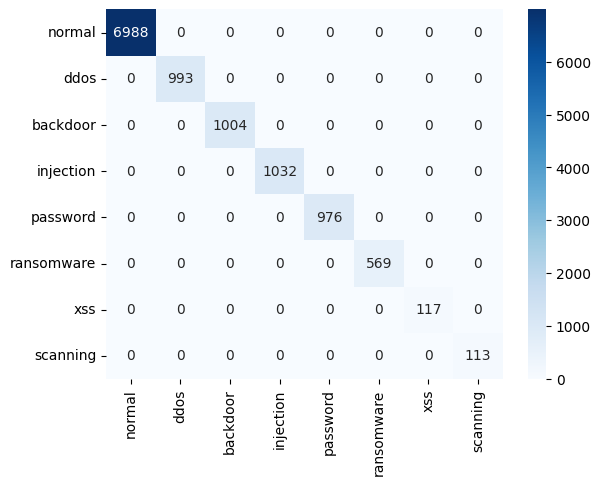

In [43]:
#Matriz de confusão
class_labels = ['normal', 'ddos', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_6), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [44]:
print(classification_report(y_test, predicao_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6988
           1       1.00      1.00      1.00       993
           2       1.00      1.00      1.00      1004
           3       1.00      1.00      1.00      1032
           4       1.00      1.00      1.00       976
           5       1.00      1.00      1.00       569
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00       113

    accuracy                           1.00     11792
   macro avg       1.00      1.00      1.00     11792
weighted avg       1.00      1.00      1.00     11792



## LSTM

In [45]:
atributos

,ts,latitude,longitude
0,0.902839,0.212096,0.224096
1,0.902839,0.221600,0.229435
2,0.902842,0.221696,0.229504
3,0.902843,0.212259,0.224210
4,0.902844,0.221779,0.229579
...,...,...,...
58955,0.058739,0.001872,0.001487
58956,0.058739,0.000629,0.001335
58957,0.058739,0.000771,0.000932
58958,0.058739,0.000811,0.000700


In [46]:
# Definindo um modelador de dados para a entrada da rede LSTM
def df_to_X_y2(df, window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)- window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [47]:
# Modelando os dados com janela tamanho 5
WINDOW_SIZE = 5
X1, y1 = df_to_X_y2(atributos, WINDOW_SIZE)

In [48]:
X1.shape


(58955, 5, 3)

In [49]:
labels_2 = classe[5:]

In [50]:
labels_2.shape

(58955,)

In [51]:
# Dividindo dados de treino e teste na proporção 80% e 20%
X_train, X_test, y_train, y_test = train_test_split(X1, labels_2, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(47164, 5, 3)

In [53]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(5,3)))  # Adicione input_shape para representar timesteps e features
model1.add(LSTM(64))
model1.add(Dense(128, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(100, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(8, activation='sigmoid'))

model1.build(input_shape=(None, 1, 2))

In [54]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [55]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(learning_rate=0.0001), metrics = ['sparse_categorical_accuracy'])

In [56]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, callbacks=[cp1])

Epoch 1/40
1474/1474 [==============================] - 19s 11ms/step - loss: 0.7024 - sparse_categorical_accuracy: 0.7641 - val_loss: 0.3740 - val_sparse_categorical_accuracy: 0.9231
Epoch 2/40
1474/1474 [==============================] - 15s 10ms/step - loss: 0.2445 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9737
Epoch 3/40
1474/1474 [==============================] - 17s 12ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9984
Epoch 4/40
1474/1474 [==============================] - 16s 11ms/step - loss: 0.0507 - sparse_categorical_accuracy: 0.9898 - val_loss: 0.0205 - val_sparse_categorical_accuracy: 0.9984
Epoch 5/40
1474/1474 [==============================] - 16s 11ms/step - loss: 0.0364 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.0151 - val_sparse_categorical_accuracy: 0.9992
Epoch 6/40
1474/1474 [==============================] - 17s 11ms/step - loss: 0.

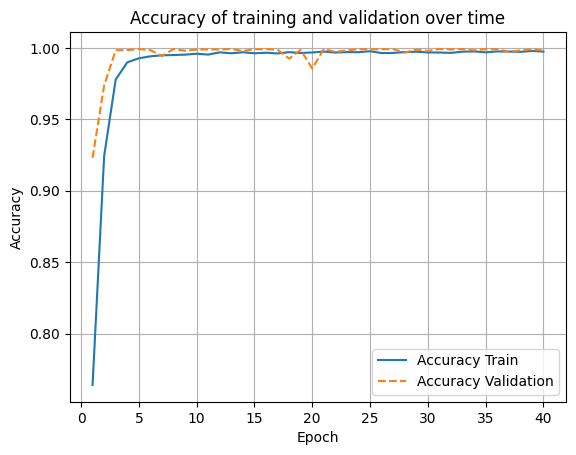

In [57]:
# Obtendo a acurácia do histórico
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']

# Obtendo as épocas
epochs = range(1, len(accuracy) + 1)

# Plotando a acurácia
plt.plot(epochs, accuracy, '-', label='Accuracy Train')
plt.plot(epochs, val_accuracy, '--', label='Accuracy Validation')
plt.title('Accuracy of training and validation over time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [58]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

369/369 [==============================] - 1s 3ms/step - loss: 0.0098 - sparse_categorical_accuracy: 0.9981


In [59]:
# Obtém as previsões do modelo para os dados de teste
y_pred = model1.predict(X_test)

# Converte as previsões para rótulos binários (0 ou 1) para cada classe individualmente
y_pred_binary = np.argmax(y_pred, axis=1)

# Calcula o recall para cada classe individualmente
recall_per_class = recall_score(y_test, y_pred_binary, average=None)

# Calcula a precisão para cada classe individualmente
precision_per_class = precision_score(y_test, y_pred_binary, average=None)

# Calcula o F-score para cada classe individualmente
f_score_per_class = f1_score(y_test, y_pred_binary, average=None)

# Calcula a média ponderada dos recalls
weighted_recall = recall_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada da precisão
weighted_precision = precision_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada do F-score
weighted_f_score = f1_score(y_test, y_pred_binary, average='weighted')

# Imprime a Accuracy
print("Accuracy: {:.4f}".format(test_accuracy))

# Imprime a média ponderada da precisão
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Imprime a média ponderada do F-score
print("Weighted F-score: {:.4f}".format(weighted_f_score))

# Imprime a média ponderada dos recalls
print("Weighted Recall: {:.4f}".format(weighted_recall))

369/369 [==============================] - 2s 3ms/step
Accuracy: 0.9981
Weighted Precision: 0.9981
Weighted F-score: 0.9981
Weighted Recall: 0.9981
